* https://twitter.com/yudapearl/status/1616051192685277184
* https://en.wikipedia.org/wiki/Lord%27s_paradox

In [1]:
using Distributions
using LinearAlgebra
dot2(x) = LinearAlgebra.dot(x, x)
using StatsPlots
default(fmt=:png)

size(F, 2) = 2012
size(M, 2) = 1988

distF = FullNormal(
dim: 2
μ: [55.0, 55.0]
Σ: [100.0 50.0; 50.0 100.0]
)

mvnF = fit(MvNormal, F) = FullNormal(
dim: 2
μ: [54.64088813441188, 54.654076126469164]
Σ: [99.26762867844357 51.8274277048141; 51.8274277048141 104.56038166121243]
)

betaF = F0 .^ (0:1)' \ F1 = [26.126179195573442, 0.5220979728718825]
sigmaF = √(dot2(F1 - evalpoly.(F0, Ref(betaF))) / (length(F0) - 2)) = 8.80786594613269


distM = FullNormal(
dim: 2
μ: [70.0, 70.0]
Σ: [100.0 50.0; 50.0 100.0]
)

mvnM = fit(MvNormal, M) = FullNormal(
dim: 2
μ: [70.0230871412971, 70.15404582923347]
Σ: [100.20126084051239 50.560538707165584; 50.560538707165584 100.38535024293436]
)

betaM = M0 .^ (0:1)' \ M1 = [34.821107120628355, 0.5045898453078494]
sigmaM = √(dot2(M1 - evalpoly.(M0, Ref(betaM))) / (length(M0) - 2)) = 8.657275360042169


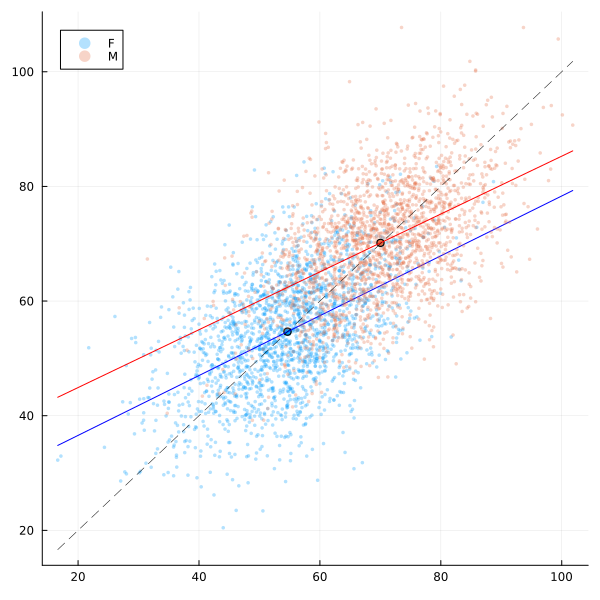

In [2]:
a, b = 55, 70
A = B = [
    100 50
    50 100
]
distF = MvNormal([a, a], A)
distM = MvNormal([b, b], B)

N = 4000
m = rand(Binomial(N, 0.5))
n = N - m
F, M = rand(distF, m), rand(distM, n)
F0, F1 = F[1,:], F[2,:]
M0, M1 = M[1,:], M[2,:]

@show size(F, 2)
@show size(M, 2)
println()
@show distF
@show mvnF = fit(MvNormal, F)
@show betaF = F0 .^ (0:1)' \ F1
@show sigmaF = √(dot2(F1 - evalpoly.(F0, Ref(betaF)))/(length(F0) - 2))
println("\n")
@show distM
@show mvnM = fit(MvNormal, M)
@show betaM = M0 .^ (0:1)' \ M1
@show sigmaM = √(dot2(M1 - evalpoly.(M0, Ref(betaM)))/(length(M0) - 2))

xs = [minimum([F0; M0]), maximum([F0; M0])]
plot()
scatter!(F0, F1; label="F", msc=:auto, alpha=0.3, ms=2, c=1)
scatter!([mean(F0)], [mean(F1)]; label="", c=1)
plot!(xs, x -> evalpoly(x, betaF); label="", c=:blue)
scatter!(M0, M1; label="M", msc=:auto, alpha=0.3, ms=2, c=2)
scatter!([mean(M0)], [mean(M1)]; label="", c=2)
plot!(xs, x -> evalpoly(x, betaM); label="", c=:red)
plot!(xs, xs; label="", c=:black, ls=:dash, lw=0.5)
plot!(size=(600, 600))

normal0 = fit_mle(Normal, [F0; M0]) = Normal{Float64}(μ=62.28584104083402, σ=12.604861202188276)


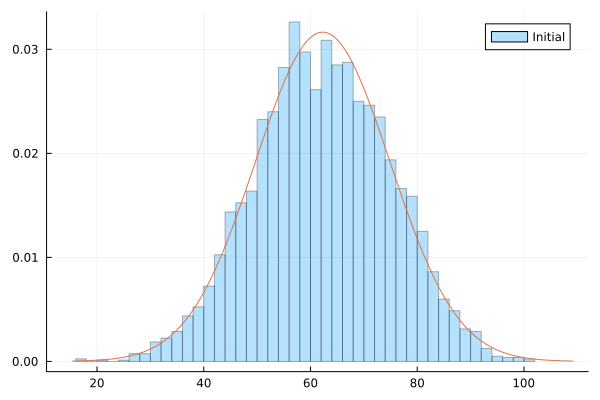

In [3]:
@show normal0 = fit_mle(Normal, [F0; M0])
histogram([F0; M0]; norm=true, alpha=0.3, bin=50, label="Initial")
plot!(normal0; label="")

normal1 = fit_mle(Normal, [F1; M1]) = Normal{Float64}(μ=62.357561068743124, σ=12.749333080653061)


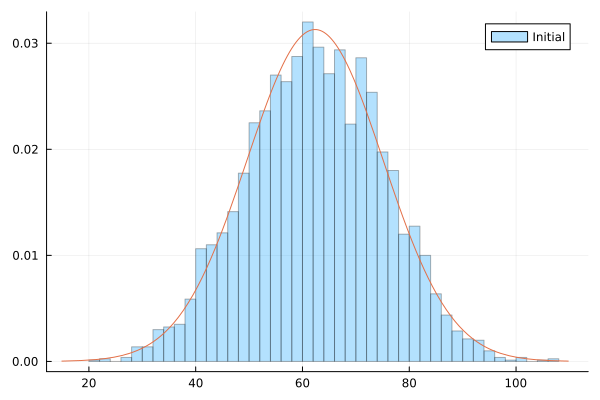

In [4]:
@show normal1 = fit_mle(Normal, [F1; M1])
histogram([F1; M1]; norm=true, alpha=0.3, bin=50, label="Initial")
plot!(normal1; label="")

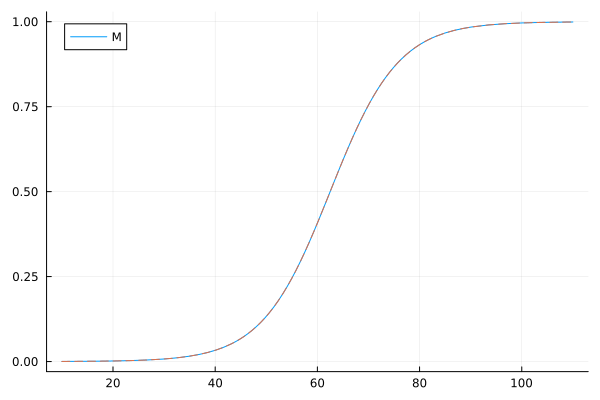

In [5]:
plot(x -> pdf(Normal(70, 10), x)/(pdf(Normal(55, 10), x) + pdf(Normal(70, 10), x)), 10, 110; label="M")
plot!(x -> cdf(Logistic((55+70)/2, 6.666), x); label="", ls=:dash)

$
(x-a)^2/200 - (x-b)^2/200
= 2(b-a)x/200 + (a^2-b^2)/200
= (b-a)x/100 + (a^2-b^2)/200
$

In [6]:
100/(b-a)

6.666666666666667

In [7]:
σ² = (A[1,1]*A[2,2] - A[1,2]^2)/A[1,1]

75.0

In [8]:
σ = √σ²

8.660254037844387

size(F, 2) = 2023
size(M, 2) = 1977

distF = FullNormal(
dim: 2
μ: [55.0, 55.0]
Σ: [100.0 50.0; 50.0 100.0]
)

mvnF = fit(MvNormal, F) = FullNormal(
dim: 2
μ: [55.07137037814407, 55.157960344436006]
Σ: [98.13181928836775 52.23455433898669; 52.23455433898669 99.8911730665187]
)

betaF = F0 .^ (0:1)' \ F1 = [25.84403842389729, 0.532289676455416]
sigmaF = √(dot2(F1 - evalpoly.(F0, Ref(betaF))) / (length(F0) - 2)) = 8.494621665823718


distM = FullNormal(
dim: 2
μ: [70.0, 70.0]
Σ: [100.0 50.0; 50.0 100.0]
)

mvnM = fit(MvNormal, M) = FullNormal(
dim: 2
μ: [69.84699796648934, 69.7949633070244]
Σ: [103.23107404232894 54.01393333849378; 54.01393333849378 105.93346077716586]
)

betaM = M0 .^ (0:1)' \ M1 = [33.24868955122759, 0.5232332787349072]
sigmaM = √(dot2(M1 - evalpoly.(M0, Ref(betaM))) / (length(M0) - 2)) = 8.817608978453784


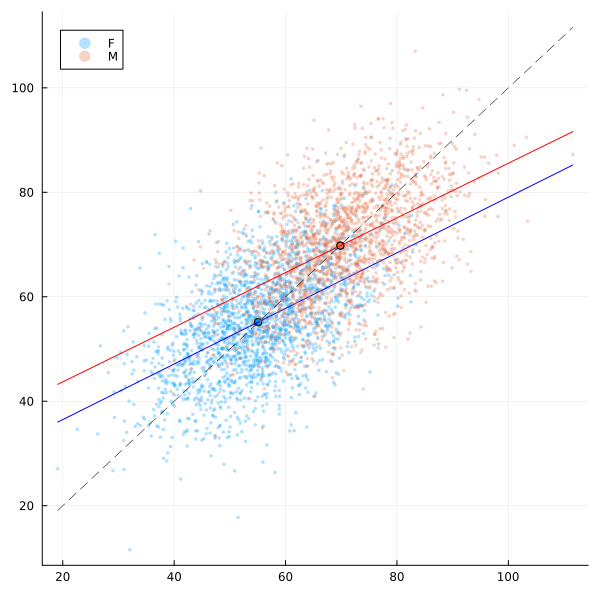

In [9]:
a, b = 55, 70

dist0 = MixtureModel([Normal(a, 10), Normal(b, 10)], [0.5, 0.5])

function distD(x)
    F = pdf(Normal(55, 10), x)
    M = pdf(Normal(70, 10), x)
    p = M/(F+M)
    Bernoulli(p)
end

function dist1(x, d)
    d == 0 ? Normal(0.5x+0.5a, σ) : Normal(0.5x+0.5b, σ)
end

N = 4000
W0 = rand(dist0, N)
W1 = [(d = rand(distD(x)); y = rand(dist1(x, d)); (d, y)) for x in W0]
F = stack([[W0[i], W1[i][2]] for i in eachindex(W0, W1) if W1[i][1] == 0])
M = stack([[W0[i], W1[i][2]] for i in eachindex(W0, W1) if W1[i][1] == 1])

F0, F1 = F[1,:], F[2,:]
M0, M1 = M[1,:], M[2,:]

@show size(F, 2)
@show size(M, 2)
println()
@show distF
@show mvnF = fit(MvNormal, F)
@show betaF = F0 .^ (0:1)' \ F1
@show sigmaF = √(dot2(F1 - evalpoly.(F0, Ref(betaF)))/(length(F0) - 2))
println("\n")
@show distM
@show mvnM = fit(MvNormal, M)
@show betaM = M0 .^ (0:1)' \ M1
@show sigmaM = √(dot2(M1 - evalpoly.(M0, Ref(betaM)))/(length(M0) - 2))

xs = [minimum([F0; M0]), maximum([F0; M0])]
plot()
scatter!(F0, F1; label="F", msc=:auto, alpha=0.3, ms=2, c=1)
scatter!([mean(F0)], [mean(F1)]; label="", c=1)
plot!(xs, x -> evalpoly(x, betaF); label="", c=:blue)
scatter!(M0, M1; label="M", msc=:auto, alpha=0.3, ms=2, c=2)
scatter!([mean(M0)], [mean(M1)]; label="", c=2)
plot!(xs, x -> evalpoly(x, betaM); label="", c=:red)
plot!(xs, xs; label="", c=:black, ls=:dash, lw=0.5)
plot!(size=(600, 600))

normal0 = fit_mle(Normal, [F0; M0]) = Normal{Float64}(μ=62.37422431368368, σ=12.458920516252693)


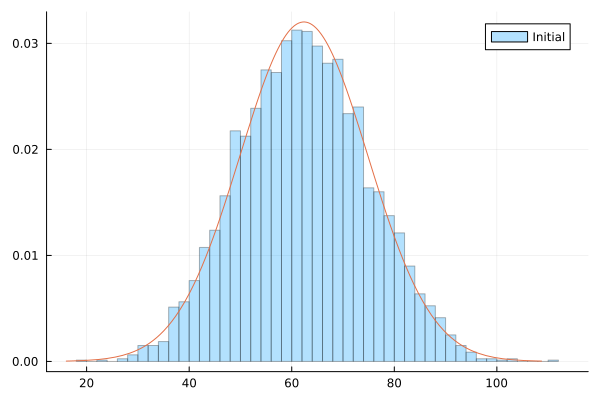

In [10]:
@show normal0 = fit_mle(Normal, [F0; M0])
histogram([F0; M0]; norm=true, alpha=0.3, bin=50, label="Initial")
plot!(normal0; label="")

normal1 = fit_mle(Normal, [F1; M1]) = Normal{Float64}(μ=62.39229905869508, σ=12.507236078680839)


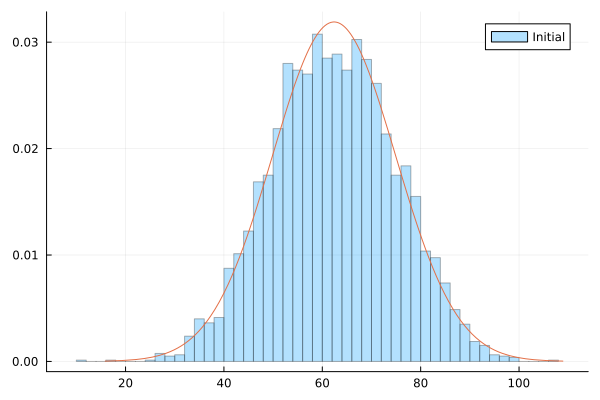

In [11]:
@show normal1 = fit_mle(Normal, [F1; M1])
histogram([F1; M1]; norm=true, alpha=0.3, bin=50, label="Initial")
plot!(normal1; label="")